In [1]:
from polyshell.Edges import CharShape
import numpy as np
import pickle as pkl
import scipy.spatial as spt
import matplotlib.pyplot as plt
import timeit

In [2]:
def plot_edges(edges : CharShape, data, filename = None):
    plt.clf()
    x = data[:,0].flatten()
    y = data[:,1].flatten()
    bound_edges = np.array(edges.bound_edges)
    bound_edges = bound_edges[edges.ids >= 0 ]
    plt.plot(x[bound_edges.T], y[bound_edges.T], linestyle='-', linewidth = 0.5, color='y')
    if filename != None:
        plt.savefig("images/" + filename + ".svg", format = "svg")



In [3]:
with open('tests/data/ionian_polygon_points.pkl', 'rb') as f:
    data = pkl.load(f)
    data = np.array(data)

1221
2221
3029


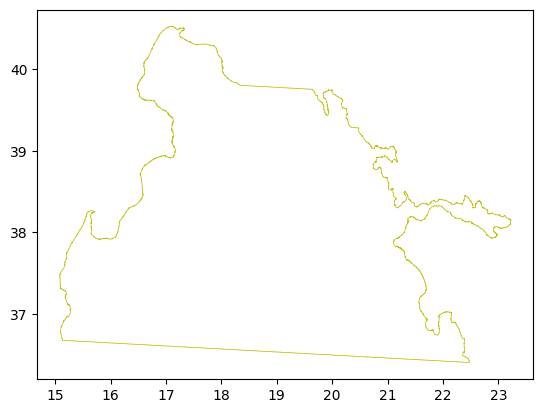

In [10]:
tri = spt.Delaunay(data) 
edges = CharShape(tri, data)
for i in range(3):
    for j in range(1000):
        edges.iterate()
    print(len(edges.bound_points))

plot_edges(edges, data)

[np.int32(50303), np.int32(50397)]
[np.int32(14369), np.int32(14504)]
[np.int32(23390), np.int32(23469)]
[np.int32(44157), np.int32(43996)]
[np.int32(4189), np.int32(4188)]
[np.int32(4188), np.int32(4484)]
[np.int32(4189), np.int32(4484)]
[np.int32(4182), np.int32(4181)]
[np.int32(4181), np.int32(5257)]
[np.int32(4182), np.int32(5257)]
[np.int32(4175), np.int32(4174)]
[np.int32(4168), np.int32(4167)]
[np.int32(4168), np.int32(48724)]
[np.int32(4168), np.int32(48542)]
[np.int32(4167), np.int32(48724)]
[np.int32(48724), np.int32(4082)]
[np.int32(48724), np.int32(4081)]
[np.int32(48724), np.int32(3816)]
[np.int32(3816), np.int32(48725)]
[np.int32(48725), np.int32(3815)]
[np.int32(48725), np.int32(3733)]
[np.int32(48725), np.int32(3672)]
[np.int32(48725), np.int32(3671)]
[np.int32(3671), np.int32(49571)]
[np.int32(49571), np.int32(3524)]
[np.int32(49571), np.int32(3501)]
[np.int32(3501), np.int32(49572)]
[np.int32(49572), np.int32(3500)]
[np.int32(49572), np.int32(3436)]
[np.int32(49572), 

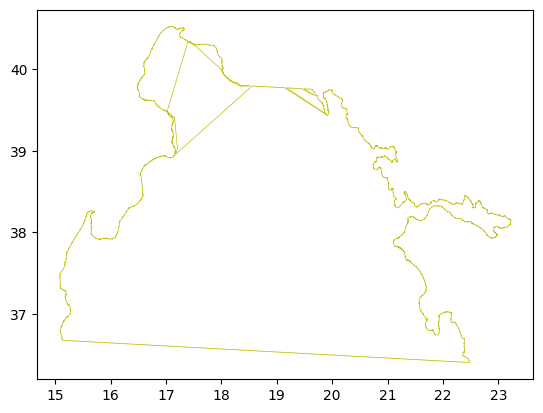

In [5]:
for i in range(50):
    edges.iterate(print_index = True)
plot_edges(edges, data)

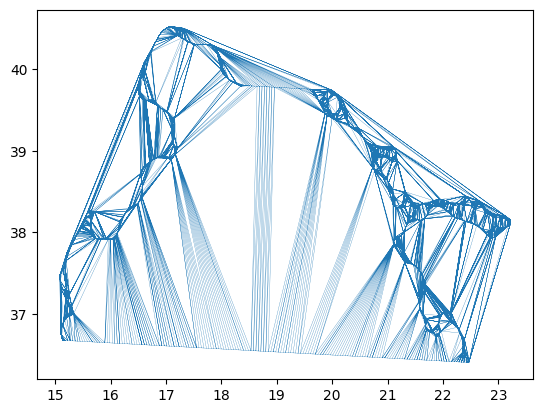

In [12]:
plt.triplot(data[:,0], data[:,1], tri.simplices, linewidth = 0.2)
plt.savefig("triplot.svg", format = "svg")

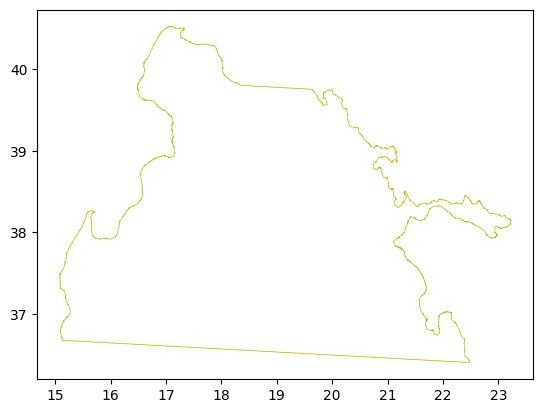

In [28]:
plot_edges(edges, data, "errorfile.svg")

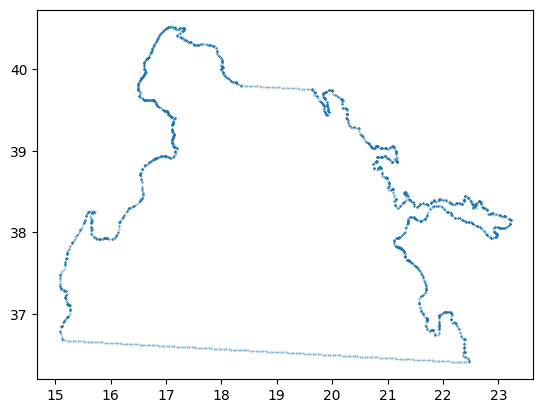

In [26]:
plt.scatter(data[np.array(list(edges.bound_points))][:,0], data[np.array(list(edges.bound_points))][:,1], s = 0.1)
plt.savefig("points.svg", format = "svg")

In [20]:
np.array(list(edges.bound_points))

array([49160, 32781,    14, ..., 49138, 49143, 47217],
      shape=(3214,), dtype=int32)

In [80]:
time_init = timeit.default_timer()
edges = Edges(tri, data)
for i in range(3000):
    edges.iterate()

time_end = timeit.default_timer()
print(time_end - time_init)

0.07749709999188781


In [83]:
edges = Edges(tri, data)
time_init = timeit.default_timer()
for i in range(3000):
    edges.iterate()

time_end = timeit.default_timer()
print(time_end - time_init)

0.06871420002426021


In [5]:
tri = spt.Delaunay(data)
charshape = CharShape(tri, data)
for batch in range(30):
    for i in range(100):
        charshape.iterate()
    filename = "fig" + str(batch)
    plot_edges(edges,data, filename)

TypeError: can only concatenate list (not "int") to list

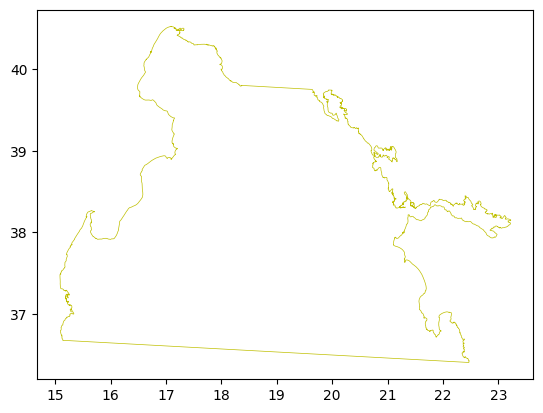

In [107]:
plt.plot(data[:,0], data[:,1], linestyle='-', linewidth = 0.5, color='y')
plt.savefig("images/" + "original" + ".svg", format = "svg")

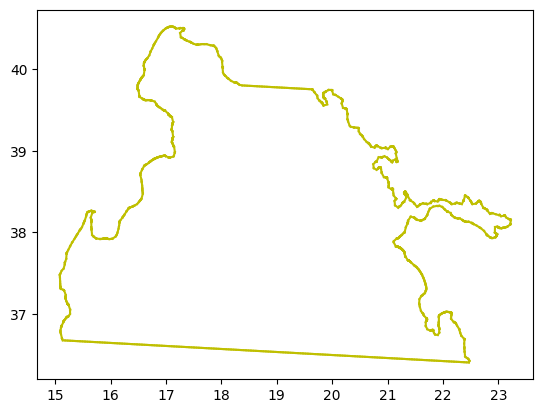

In [50]:
for i in range(1000):
    edges.iterate()
plot_edges(edges, data)

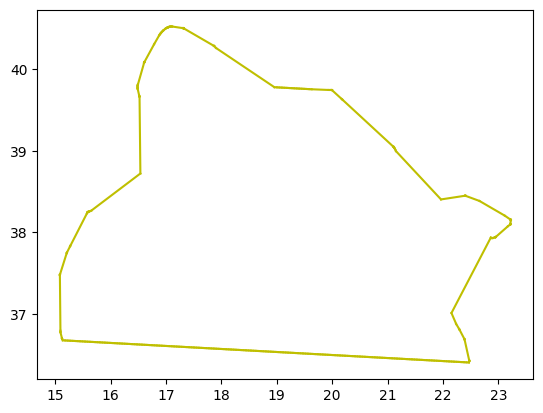

In [89]:
edges = Edges(tri, data)
for i in range(100):
    edges.iterate()
plot_edges(edges, data)

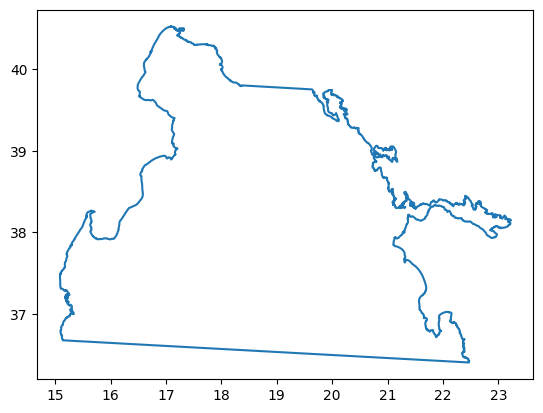

In [47]:
plt.plot(data[:,0], data[:,1])

In [ ]:
tri.neighbors[simp_ids[-1]]

array([   -1, 10577, 16385], dtype=int32)

In [ ]:
for i in range(1000):
    #remove the longest edge
    longest_edge = boundary_edges_id[-1]
    be_edge_new_1 = np.array([longest_edge[0], node_prime[-1]])
    be_edge_new_2 = np.array([longest_edge[1], node_prime[-1]])
    boundary_points_id = np.concatenate([boundary_points_id, node_prime[-1]])
    
    #are the 2 new edges regular?
    
    #recheck regularity
    irregular_node_prime = (node_prime[:-1] == node_prime[-1])


    #new prime node, simp_id, new lengths 
    # we can never make something irregular regular again, so we can just remove them
    #suffices to check neighboring simplices
    for neighbours in tri.neighbors[simp_ids[-1],:]:
        if neighbour > 0:
            #the new edges are irregular if their coprime node is in the boundary points

        else:
            pass    

    #remove it from the list
    boundary_edges_id = boundary_edges_id[:-1]
    simp_ids = simp_ids[:-1]
    node_prime = node_prime[:-1]
    be_lengths = be_lengths[:-1]
    
    #add the new edges
    new_edge_1 = [longest_edge[0], longest_node_prime]
    new_edge_2 = [longest_edge[1], longest_node_prime]
    
    #add them to the list
    boundary_edges_id = np.vstack([boundary_edges_id, new_edge_1, new_edge_2])
    
    #add the new point to the list of boundary points
    boundary_points_id = np.append(boundary_points_id, longest_node_prime)
    
    #recalculate regularity
    regular_id = np.logical_not(np.isin(node_prime,boundary_points_id))
    boundary_edges_id = boundary_edges_id[regular_id]
    simp_ids = simp_ids[regular_id]
    node_prime = node_prime[regular_id]
    
    #recalculate lengths and sort them
    be_lengths = np.linalg.norm(data[boundary_edges_id[:,0]] - data[boundary_edges_id[:,1]], axis = 1)
    sort_id = np.argsort(be_lengths)
    
    be_lengths = be_lengths[sort_id]
    boundary_edges_id = boundary_edges_id[sort_id]
    simp_ids = simp_ids[sort_id]
    node_prime = node_prime[sort_id]

In [ ]:
be_1_prime = tri.simplices[tri.neighbors[:,0] == -1][:,0]
be_2_prime = tri.simplices[tri.neighbors[:,1] == -1][:,1]
be_3_prime = tri.simplices[tri.neighbors[:,2] == -1][:,2]
#these are the third nodes of our boundary simplices

In [ ]:
boundary_points_idx = boundary_edges_idx.flatten()


In [ ]:
np.sum(be_1_prime[be_1_prime >= 0]) - np.sum(be_1_prime[be_1_prime in boundary_points_idx])

3246642

In [ ]:
np.sum(np.isin(be_2_prime, boundary_points_idx))

0

In [ ]:
be_1_prime

array([26613, 26858, 52582, 52445, 26866, 52480, 48331,  5352,  5258,
       39005, 52786, 48331,  4173,  5258, 45605, 39218, 39433, 45767,
       45700, 45698, 48531, 48531,  5351,  5351, 38999, 39992, 39987,
       39987, 45749, 45698, 45698, 52782, 42237, 46889, 48531, 48531,
       48531, 35075, 34458, 32959, 39990, 39987, 52737, 52682, 42242,
       46888, 46890, 46762, 32261, 32261, 32261, 32261, 35111, 35600,
       34459, 32959, 39775, 45795, 46891, 46850, 32262, 32261, 35075,
       35601, 34996, 34458, 52832, 52768, 52778, 42221, 46759, 32259,
       35182, 35602, 38769, 38463, 32957,     4, 42919, 46716, 26605,
       35709, 38357, 38339,   710,    15, 35737], dtype=int32)

In [ ]:
boundary_points_idx

array([   14,    18,   663,   664,   665,   666,   669,   670,  7253,
        7254, 26606, 26607, 26608, 26611, 26615, 26616, 26867, 26868,
       26872, 38770, 38771, 38772, 38773, 38774, 38775, 38776, 38777,
       38778, 38779, 38780, 38781, 38782, 38783, 38784, 38785, 38786,
       38787, 38788, 38789, 38790, 38791, 38792, 38793, 38794, 38795,
       38796, 38797, 38798, 38799, 38800, 38801, 38802, 38803, 38804,
       38805, 38806, 38807, 38808, 38809, 38810, 38811, 38812, 38813,
       38814, 38815, 38816, 38817, 38818, 38819, 38820, 38821, 38822,
       38823, 38824, 38825, 38826, 38827, 38828, 38829, 38830, 38831,
       38832, 38833, 38834, 38835, 38836, 38837, 38838, 38839, 38840,
       38841, 38842, 38843, 38844, 38845, 38846, 38847, 38848, 38849,
       38850, 38851, 38852, 38853, 38854, 38855, 38856, 38857, 38858,
       38859, 38860, 38861, 38862, 38863, 38864, 38865, 38866, 38867,
       38868, 38869, 38870, 38871, 38872, 38873, 38874, 38875, 38876,
       38877, 38878,

In [ ]:
np.isin(tri.simplices[:,2],boundary_points_idx).sum()

511

In [ ]:
tri.simplices[(np.isin(tri.simplices[:,0],boundary_points_idx)) &
              (np.isin(tri.simplices[:,1],boundary_points_idx))&
              (np.isin(tri.simplices[:,2],boundary_points_idx))]

array([], shape=(0, 3), dtype=int32)

In [ ]:
#
irregular_edges_idx = boundary_edges_idx[(np.isin(boundary_edges_idx[:,0],boundary_points)) & (np.isin(boundary_edges_idx[:,1], boundary_points))]
regular_edges_idx = boundary_edges_idx[(np.isin(boundary_edges_idx[:,0],boundary_points)) != (np.isin(boundary_edges_idx[:,1], boundary_points))]

In [ ]:
edge_lengths = np.linalg.norm(data[boundary_points[:-1]] - data[boundary_points[1:]], axis = 1)

In [ ]:
sort_idx = np.argsort(edge_lengths)

In [ ]:
regular_edges_idx = boundary_edges_idx[1 - np.isin(boundary_edges_idx,irregular_edges_idx)]

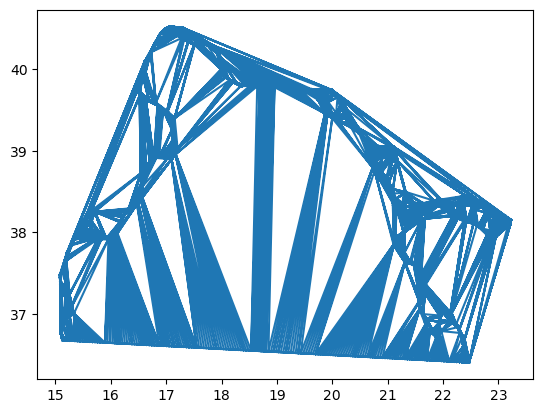

In [ ]:
plt.triplot(data[:,0], data[:,1])
plt.plot(data[regular_edges_idx.flatten()][:,0], data[regular_edges_idx.flatten()][:,1])
#plt.plot(data[:,0], data[:,1], 'or')

In [ ]:
data.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
boundary_edges = []

for i in range(len(tri.neighbors)):
    for k in range(3):
        if (tri.neighbors[i][k] == -1):
            nk1,nk2 = (k+1)%3, (k+2)%3 
            boundary_edges.append((tri.simplices[i][nk1],tri.simplices[i][nk2]))

boundary_edges = np.array(boundary_edges)


NameError: name 'boundary' is not defined

In [ ]:
tri.neighbors

array([[    -1,     24,      1],
       [    56,      0,   1339],
       [    -1,      3,     27],
       ...,
       [ 95505,  90457, 105473],
       [ 93346,  97572, 105476],
       [ 97573,  97548, 105475]], dtype=int32)

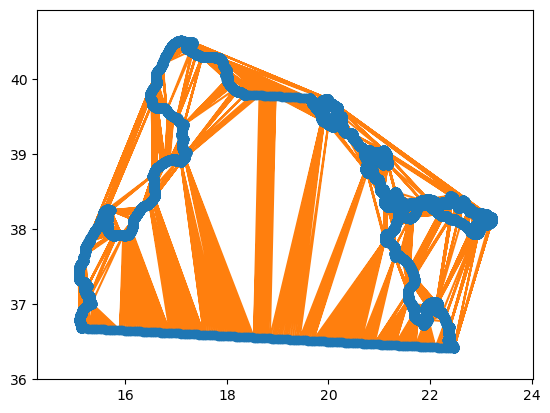

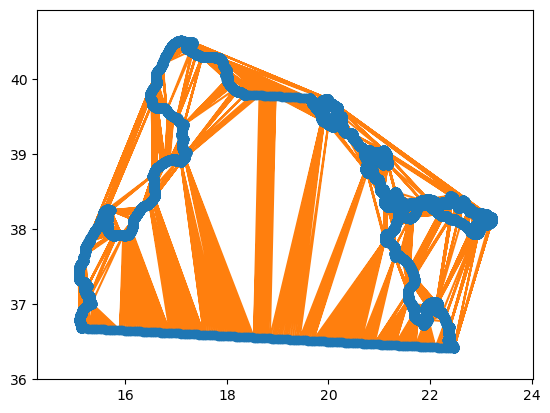

In [ ]:
spt.delaunay_plot_2d(triangulation)

In [ ]:
n_nodes = 15
distances = np.abs(np.random.normal(size = 15))
x_ch = np.random.uniform(size = n_nodes)
y_ch = np.random.uniform(size = n_nodes)

edge_list = [(i, (i+1)%15)for i in range(n_nodes)]
edge_paths = {(i, (i+1)%n_nodes) : np.array([(x_ch[i],y_ch[i])]) for i in range(n_nodes)}

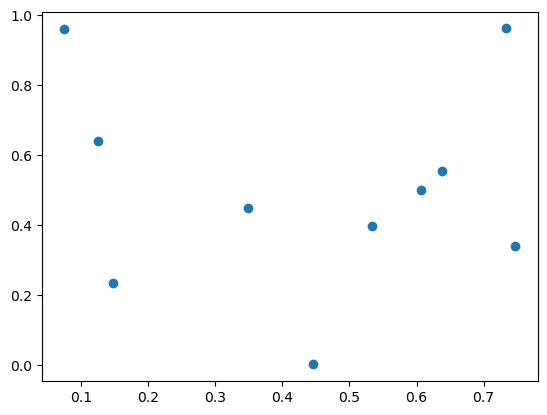

In [ ]:
points = np.random.uniform(size = (10,2))
x, y = points.T
plt.scatter(x,y)

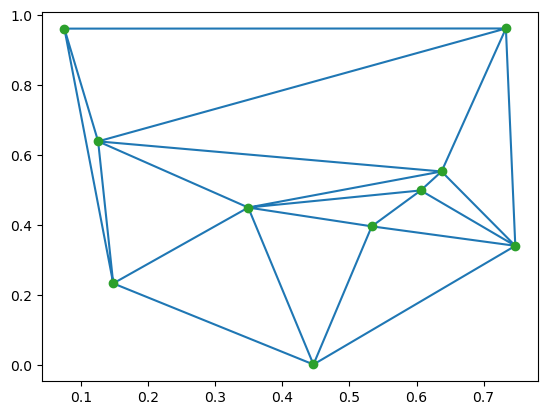

In [ ]:
tri = Delaunay(points)
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [ ]:
tri.simplices

array([[7, 1, 6],
       [9, 5, 0],
       [6, 9, 0],
       [1, 9, 6],
       [5, 4, 8],
       [9, 4, 5],
       [4, 9, 1],
       [2, 7, 8],
       [7, 2, 1],
       [3, 4, 1],
       [2, 3, 1],
       [4, 3, 8],
       [3, 2, 8]], dtype=int32)

In [ ]:
tri.neighbors

array([[ 3, -1,  8],
       [-1,  2,  5],
       [ 1, -1,  3],
       [ 2,  0,  6],
       [11, -1,  5],
       [ 4,  1,  6],
       [ 3,  9,  5],
       [-1, 12,  8],
       [10,  0,  7],
       [ 6, 10, 11],
       [ 9,  8, 12],
       [12,  4,  9],
       [ 7, 11, 10]], dtype=int32)

In [ ]:
np.linalg.norm(points[6] - points[7])

0.3776983438807038

In [ ]:
np.linalg.norm(points[boundary_edges[:,0]] - points[boundary_edges[:,1]], axis = 1)

array([0.37769834, 0.65787762, 0.73149199, 0.62102252, 0.45320311])

In [ ]:
boundary_edges

array([[26615, 26611],
       [26867, 26616],
       [52594, 52576],
       [52446, 52427],
       [26868, 26867],
       [52496, 52479],
       [38878, 38877],
       [38844, 38843],
       [38850, 38849],
       [39002, 39001],
       [52823, 52785],
       [38874, 38873],
       [38856, 38855],
       [38851, 38850],
       [38914, 38913],
       [39249, 39217],
       [38932, 38931],
       [38901, 38900],
       [38904, 38903],
       [38909, 38908],
       [38868, 38867],
       [38862, 38861],
       [38847, 38846],
       [38845, 38844],
       [39000, 38934],
       [38919, 38918],
       [38925, 38924],
       [38923, 38922],
       [38902, 38901],
       [38907, 38906],
       [38911, 38910],
       [52784, 52783],
       [42238, 42236],
       [38884, 38883],
       [38865, 38864],
       [38863, 38862],
       [38871, 38870],
       [38793, 38792],
       [38801, 38800],
       [38808, 38807],
       [38922, 38921],
       [38927, 38926],
       [52746, 52736],
       [526

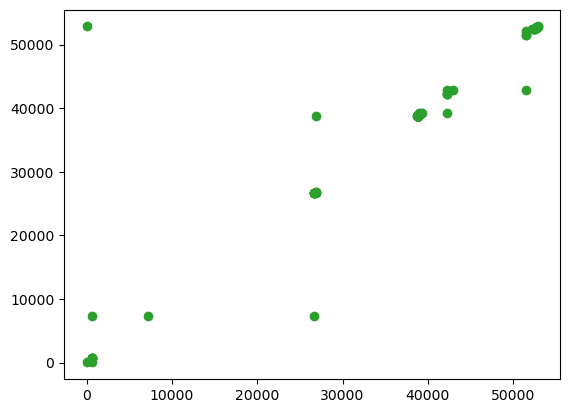

In [ ]:
plt.triplot(data[:,0], data[:,1], tri.simplices)
plt.plot(boundary_edges[:,0],boundary_edges[:,1], 'o')

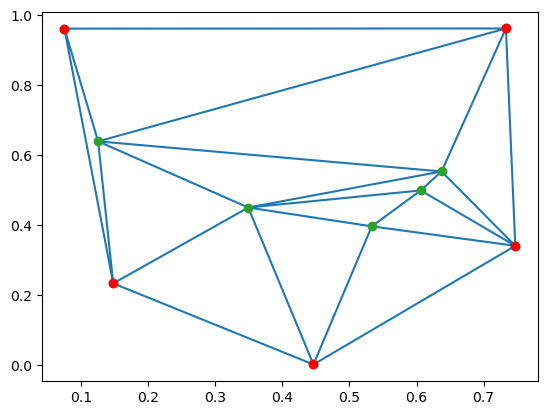

In [ ]:
boundary = set()
boundary_edges = []
for i in range(len(tri.neighbors)):
    for k in range(3):
        if (tri.neighbors[i][k] == -1):
            nk1,nk2 = (k+1)%3, (k+2)%3 
            boundary.add(tri.simplices[i][nk1])
            boundary.add(tri.simplices[i][nk2])
            boundary_edges.append((tri.simplices[i][nk1],tri.simplices[i][nk2]))

boundary_edges = np.array(boundary_edges)
boundary_edges = np.c_[boundary_edges,np.linalg.norm(points[boundary_edges[:,0]] - points[boundary_edges[:,1]], axis = 1)]
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.plot(points[list(boundary),0], points[list(boundary),1], 'or')

In [ ]:
boundary_edges[boundary_edges[:,2].argsort()[::-1]]

array([[0.        , 6.        , 0.73149199],
       [5.        , 0.        , 0.65787762],
       [8.        , 5.        , 0.62102252],
       [7.        , 8.        , 0.45320311],
       [6.        , 7.        , 0.37769834]])

C:\Users\kam224\AppData\Roaming\Python\Python312\site-packages\netgraph\_utils.py:360: RuntimeWarning: invalid value encountered in divide
  v = v / np.linalg.norm(v, axis=-1)[:, None] # unit vector


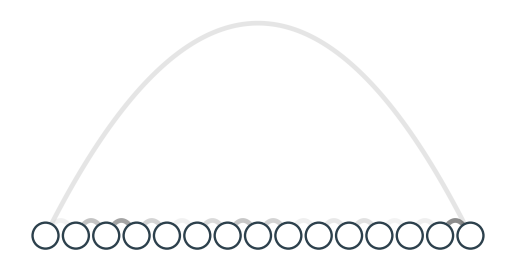

In [ ]:
ng.ArcDiagram(graph_data)

In [ ]:
rand_weights = np.abs(np.random.normal(size = len(G.edges)))
for i in range(10):
    G[i][(i+1)%10]["weight"] = rand_weights[i]

In [ ]:
pos= graphviz_layout(G) 
nx.draw_networkx(G,pos)
edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

ImportError: requires pygraphviz http://pygraphviz.github.io/

In [ ]:
def draw_G(G):
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

    pos = nx.spring_layout(G)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
    nx.draw_networkx_edges(
        G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
    )

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()